**Importing Libraries**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Data Collection and Pre-processing**

In [34]:
df = pd.read_csv("/content/mail_data.csv")

In [35]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [36]:
# checking if there are any null values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [37]:
df.shape

(5572, 2)

**Label Encoding**

In [38]:
df.loc[df['Category']=='spam','Category']=0
df.loc[df['Category']=='ham','Category']=1

For 'spam' - 0

For 'ham' -1 

In [39]:
X = df['Message']
Y = df['Category']

In [40]:
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


**Splitting the Data into Train and Test Dataset**

In [41]:
X_train, X_test , Y_train , Y_test = train_test_split(X ,Y ,test_size=0.33, random_state=1)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(3733,)
(1839,)
(3733,)
(1839,)


**Feature Extraction**

In [43]:
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_vectorizer = vectorizer.fit_transform(X_train)
X_test_vectorizer = vectorizer.transform(X_test)
#print(X_train_vectorizer)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

**Building Model**

***Logistic Regression***

In [44]:
model = LogisticRegression(random_state=1)
model.fit(X_train_vectorizer,Y_train)


LogisticRegression(random_state=1)

Text(0.5, 1.0, 'Learning Curve')

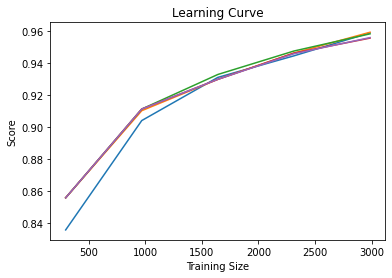

In [45]:
train_sizes, train_scores, test_scores = learning_curve(model,X_train_vectorizer,Y_train)
plt.plot(train_sizes,train_scores)
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve")

Accuracy on Training Dataset with LR trained model

In [46]:
# Predicting on Train Data
predict_train = model.predict(X_train_vectorizer)
accuracy_on_training_data = accuracy_score(Y_train,predict_train)
accuracy_on_training_data

0.9638360567907849

Accuracy on Test Dataset with LR trained model

In [47]:
# Predicting on Test Data
predict_test = model.predict(X_test_vectorizer)
accuracy_on_test_data = accuracy_score(Y_test,predict_test)
accuracy_on_test_data



0.9624796084828712

***SVM***

In [48]:
# Importing SVC Model
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_vectorizer,Y_train)

SVC()

In [49]:
# Predicting on Training Data
predict_train = svm_model.predict(X_train_vectorizer)
accuracy_on_training_data = accuracy_score(Y_train,predict_train)
accuracy_on_training_data

0.9975890704527189

In [50]:
# Prdicting on Test Data
predict_test = svm_model.predict(X_test_vectorizer)
accuracy_on_test_data = accuracy_score(Y_test,predict_test)
accuracy_on_test_data

0.9760739532354541

**Building Predictive System**

In [51]:
input_mail = [input()]
input_vectorizer = vectorizer.transform(input_mail)

prediction = model.predict(input_vectorizer)
if prediction==0:
  print("Spam")
else:
  print("Ham")

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Spam
